<center><h2> Exploratory Data Analytics

#### Import Required Python Packages

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline 
sns.set(context="notebook",style="white",palette="dark")
plt.style.use('ggplot')

import numpy as np #for scientific computations

from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

#### Read data into Pnadas DataFrame

In [152]:
df = pd.read_csv("mlb.csv")
print(df.shape)
df.head(8)

(352, 21)


,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,...,37,141,234,77,358,67,965,70.27797,18.84423,10.8778
6,275000,catcher,white,38407380,10,432,1005,78,240,35,...,13,95,239,39,140,1,990,70.27797,18.84423,10.8778
7,235000,shortstop,hispanic,38407380,4,223,491,37,118,16,...,1,29,240,23,62,6,963,70.27797,18.84423,10.8778


In [167]:
print(list(df.columns))

['salary', 'player_position', 'race', 'team_payroll', 'years_played', 'games_played', 'career_at_bats', 'career_runs', 'career_hits', 'career_doubles', 'career_triples', 'career_homeruns', 'career_runs_batted_in', 'career_batting_average', 'career_walks', 'career_strike_outs', 'career_stolen_bases', 'career_fielding_percent', 'white_percent_in_city', 'black_percent_in_city', 'hispanic_percent_in_city']


#### Selecting variables for analysis

In [153]:
selected_variables = df[['salary', 'years_played', "games_played", "career_runs", "race"]]
selected_variables

,salary,years_played,games_played,career_runs,race
0,3375000,8,918,407,black
1,3100000,5,751,370,white
2,2900000,8,1056,405,white
3,1650000,12,1196,437,black
4,700000,17,2032,1136,black
...,...,...,...,...,...
347,312000,5,439,150,white
348,275000,2,211,63,hispanic
349,250000,3,249,112,white
350,200000,6,667,217,white


#### Histogram of variables

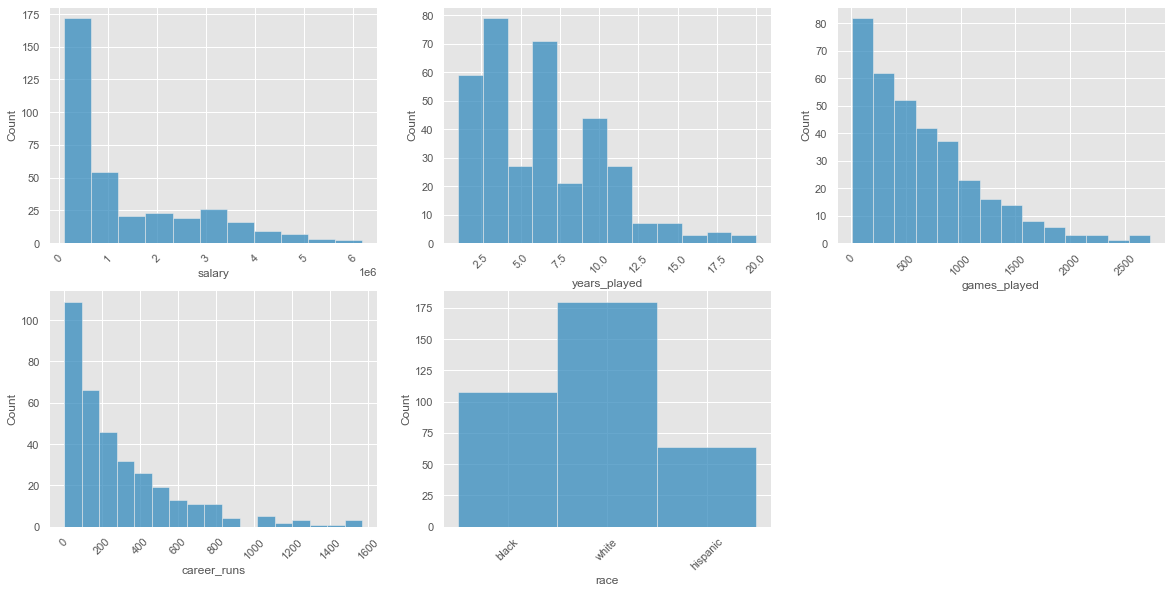

In [154]:
fig=plt.figure(figsize=(20,20))

for e, column in enumerate(selected_variables.columns.to_list()):
    plt.subplot(4, 3, e + 1)
    plt.xticks(rotation = 45)
    sns.histplot(data= df, x=column)

#### Descriptive Statistics

In [155]:
display(selected_variables.describe())
selected_variables.describe(include = "object")


,salary,years_played,games_played,career_runs
count,3.520000e+02,352.000000,352.000000,352.000000
mean,1.331514e+06,6.309659,645.423295,288.170455
std,1.383952e+06,3.873810,536.499990,298.500277
min,1.090000e+05,1.000000,7.000000,1.000000
25%,2.527000e+05,3.000000,230.000000,73.000000
50%,6.750000e+05,6.000000,518.500000,190.500000
75%,2.250000e+06,9.000000,930.000000,405.500000
max,6.200000e+06,20.000000,2729.000000,1570.000000


,race
count,352
unique,3
top,white
freq,180


#### Compare Two scenerios using PMF

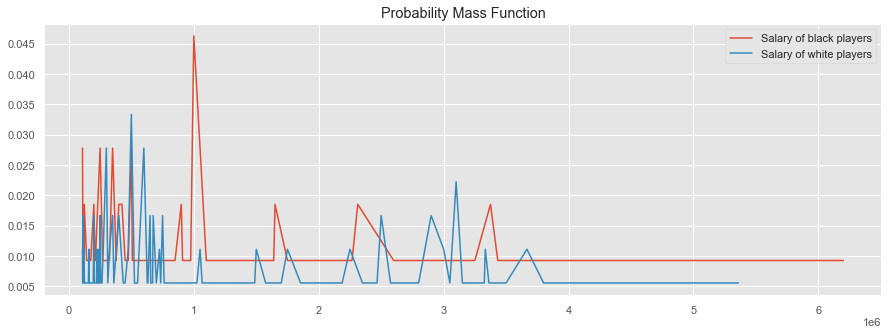

In [156]:
plt.figure(figsize=(15, 5))
black_players = df['salary'][(df.race == "black")]
white_players = df['salary'][(df.race == "white")]

pmf_black_players = black_players.value_counts().sort_index() / len(black_players)
pmf_white_players = white_players.value_counts().sort_index() / len(white_players)
pmf_black_players.plot(label = "Salary of black players")
pmf_white_players.plot(label = "Salary of white players")
plt.title("Probability Mass Function")

plt.legend()
plt.show()

#### CDF of variables

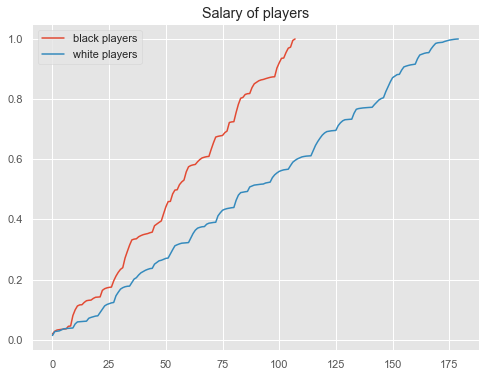

In [157]:
data1_pdf = np.array(black_players) / sum(np.array(black_players))
data2_pdf = np.array(white_players) / sum(np.array(white_players))

# CDF
data1_cdf = data1_pdf.cumsum()
data2_cdf = data2_pdf.cumsum()

plt.figure(figsize=(8, 6))

plt.plot(data1_cdf, '-',label = "black players")
plt.plot(data2_cdf, '-', label = "white players")
plt.legend()
plt.title("Salary of players");

__Inference:__ This figure makes the shape of the
distributions, and the differences between them, much clearer. We can see black player salaries are much higher throughout the distribution, with a larger discrepancy above the mean.

#### Develop one analytical plot

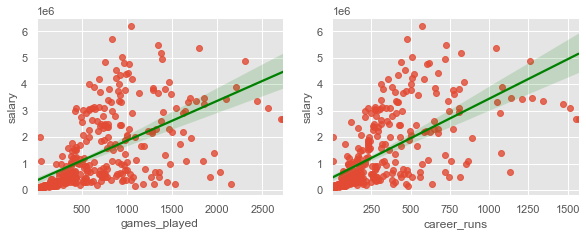

In [158]:
fig=plt.figure(figsize=(15,15))

for e, column in enumerate(["games_played", "career_runs"]):
    plt.subplot(4, 3, e + 1)
    sns.regplot( data= selected_variables, x=column, y='salary', line_kws={"color": "green"})

__Inference:__ From the above graphs, we can depict that each of them games_played and career_runs have positive linear relationship with the salary of Players. So, these three features will be very important in developing Regression Model for predictive analysis.
    

#### Scatterplot with two variables, pearson's, spearman's correlation

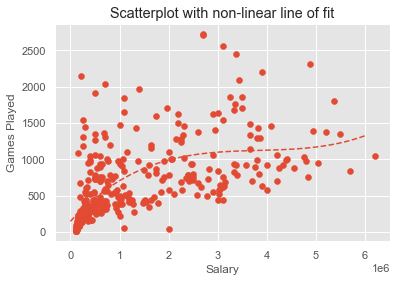

Features correlating with salary of players: 


,salary
salary,1.000000
career_runs,0.643348
games_played,0.584546
years_played,0.473349


Pearson Correlation of features:


,salary,games_played
salary,1.000000,0.584546
games_played,0.584546,1.000000


Spearman Correlation of features:


,salary,games_played
salary,1.000000,0.763543
games_played,0.763543,1.000000


In [159]:
mymodel = np.poly1d(np.polyfit(df["salary"],df["games_played"], 3))

myline = np.linspace(1, 6e6)
plt.title("Scatterplot with non-linear line of fit")

plt.scatter(df["salary"],df["games_played"])
plt.plot(myline, mymodel(myline), '--' )
plt.xlabel("Salary")
plt.ylabel("Games Played")
plt.show()

print("Features correlating with salary of players: ")
display(selected_variables.corr()[['salary']].sort_values(by='salary', ascending=False))

print("Pearson Correlation of features:")
display(df[['salary', "games_played"]].corr(method = "pearson"))

print("Spearman Correlation of features:")
df[['salary', "games_played"]].corr(method = "spearman")

#### Hypothesis Test

__Null Hypothesis :__ More years of experience and games played doesn't impact the salary of players at 95% confidence interval. <br>
__Alternative Hypothesis:__ Mean salary of the players increases with more years of Experience and games played by the player at 95% confidence interval. .

In [176]:

# generate two independent samples
data1 = df['salary'][(df.years_played >= 10)]
data2 = df['salary'][(df.years_played < 10)]
# compare samples
from scipy.stats import mannwhitneyu

#Mann-Whitney test is useful in general (no assumption of normal distribution)
_,pval = mannwhitneyu(data1,data2)
print('p-value',pval)

if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value 4.2650962900542127e-08
We reject null hypothesis


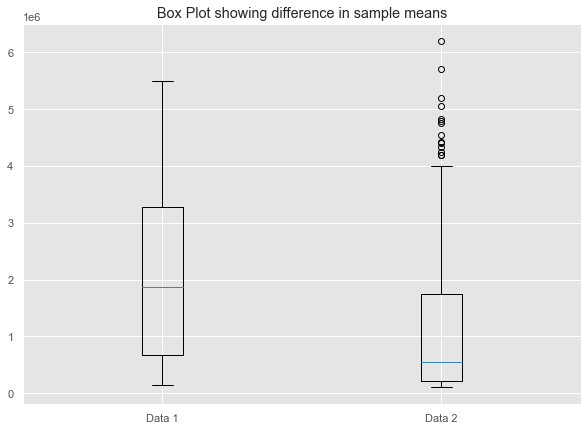

In [178]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(10,7))
ax = fig.add_subplot(111) 
plt.boxplot([data1,data2]) 
plt.title('Box Plot showing difference in sample means')
ax.set_xticklabels(['Data 1', 'Data 2'])
plt.show()

#### Regression Analysis

In [163]:
X = selected_variables.drop(["salary", "race"], axis=1)
y = selected_variables["salary"]

In [49]:
#Divide the independent and dependent variables into training and testing sets(with 25% data for test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
#libraries for models
from sklearn.ensemble import RandomForestRegressor

#fitting model
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [51]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head()

,Actual,Predicted
228,750000,745000.0
116,167500,171250.0
55,122500,124450.0
155,4750000,4903333.4
110,670000,675000.0


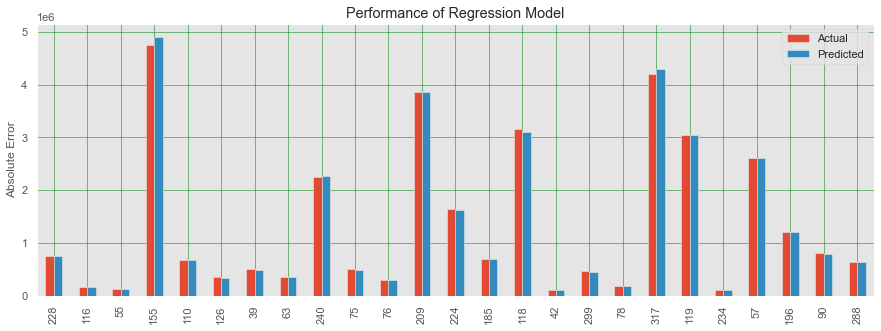

In [56]:
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(15,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Regression Model')
plt.ylabel('Absolute Error')
plt.show()